## 1. Let us consider the MNIST, a dataset of hand-written digits [Click here to download the dataset]. The objective here is to de-noise the images provided. Then, perform the following tasks.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### (a) Load the dataset and visually see the images (16×16 pixels).

In [18]:
df = pd.read_csv('noisy_mnist.csv', header = None)

In [19]:
print(df.head())

        0         1         2         3         4         5         6    \
0  0.264608  0.060024  0.146811  0.336136  0.280311 -0.139760  0.233830   
1 -0.108767 -0.202736 -0.170056  0.332693  0.186255  0.280204  0.253478   
2 -0.199832 -0.295294 -0.099008  0.026376  0.074813  0.157204  0.042648   
3  0.277441 -0.031975 -0.070889  0.047647  0.075778  0.556461  0.741170   
4  0.256846 -0.118795 -0.155106 -0.134832  0.297439  0.241704  0.469472   

        7         8         9    ...       246       247       248       249  \
0  0.371765  0.669086  0.530387  ...  0.911594  1.065910  0.813509  0.559103   
1  0.363563  0.039638  0.300219  ...  0.564037  0.439045  0.601399  0.758090   
2  0.261847 -0.017913  0.042030  ...  0.006110 -0.227748  0.048597  0.511590   
3  0.604523  0.770517  0.562931  ...  0.290294  0.645014  0.688283 -0.053283   
4  0.815539  0.763322  0.545774  ...  0.475727  1.085077  1.194813  0.838231   

        250       251       252       253       254       255  
0  0

In [20]:
df.shape

(9298, 256)

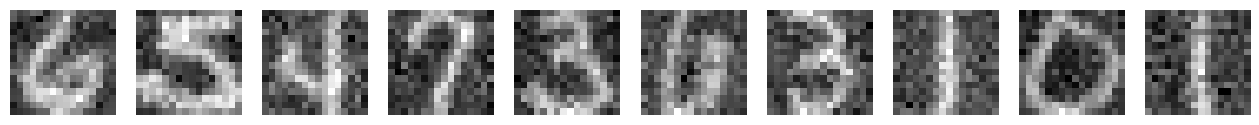

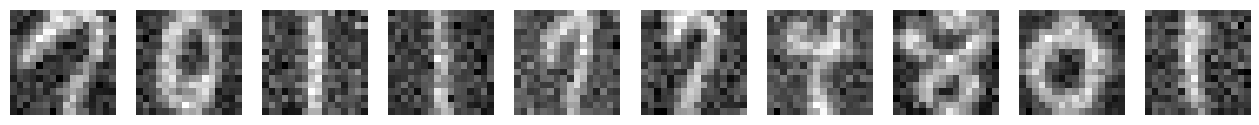

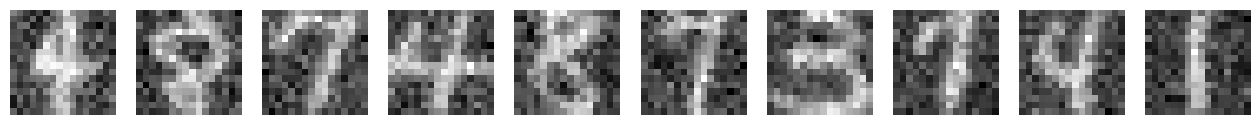

In [21]:
# Reshape each row into a 16x16 image
images = df.values.reshape(-1, 16, 16)

# Number of images
num_samples = len(images)

# Create a function to display images in batches
def display_images(start_index, batch_size):
    end_index = start_index + batch_size
    if end_index > num_samples:
        end_index = num_samples

    fig, axes = plt.subplots(1, batch_size, figsize=(16, 4))

    for i in range(start_index, end_index):
        axes[i - start_index].imshow(images[i], cmap='gray')
        axes[i - start_index].axis('off')
    
    plt.show()

# Define the batch size and initial index
batch_size = 10
current_index = 0

# Display images in batches
while current_index < num_samples:
    display_images(current_index, batch_size)
    user_input = input("Press Enter to view the next batch or type exit to quit: ")
    if user_input.lower() == 'exit':
        break
    current_index += batch_size


In [22]:
# Function to plot the images 
def plot_mnist_images(X):
    # X: MNIST image
    fig, ax = plt.subplots (10, 10, figsize = (5,5)) 
    ax = ax.flatten()
    for img, a in zip (X,ax):
        a.imshow(img.reshape(16,16), cmap='Greys')
        a.axis('off')

In [23]:
X = np.array(df)
df.shape

(9298, 256)

### (b) Split the obtained dataset into training and testing samples with the training set having 80% of samples, and the remaining 20% of samples in the test set. Use the training set for applying PCA to perform de-noising of the images. Write your own codes to perform PCA using the singular value decomposition (SVD) algorithm. You can use the in-built functions in Python for the SVD.

In [24]:
X_train, X_test = train_test_split(X, train_size = 0.8)

In [25]:
# SVD
U,S,Vt = np.linalg.svd(X_train)

In [26]:
# Function to get the principal components 
def get_principal_comps (X, Vt,n):
    # X: data matrix, Vt: right singular matrix
    PC = X@(Vt.T)
    return PC[:,:n]

# Function to reconstruct the images 
def reconstruct_data_mat (PC, Vt,n):
    # PC: principal components. Vt: Right singular matrix
    X_ = PC@(Vt[:n, :])
    return X_

In [27]:
n = 256
PC_image = get_principal_comps(X_train,Vt,n)
recons_img = reconstruct_data_mat(PC_image,Vt,n)

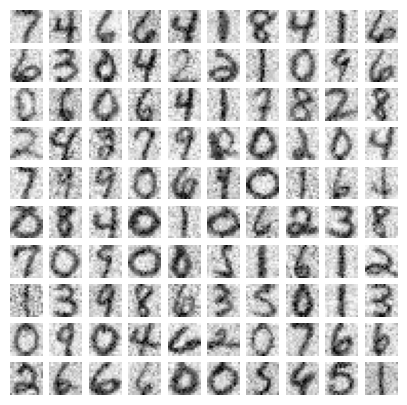

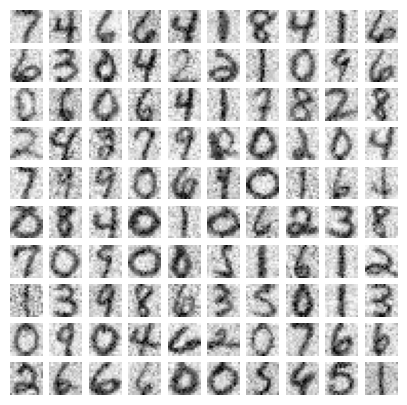

In [28]:
plot_mnist_images(X_train)
plot_mnist_images(recons_img)

### (c) Do PCA on the training set and choose the appropriate number of principal components by visually analyzing the de-noised images (You have to reconstruct the entire image from the principal components)

Reconstructed Images (n=10)
Reconstructed Images (n=25)
Reconstructed Images (n=50)
Reconstructed Images (n=100)
Reconstructed Images (n=150)
Reconstructed Images (n=200)
Reconstructed Images (n=250)


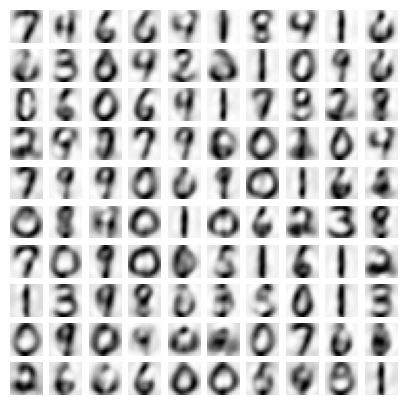

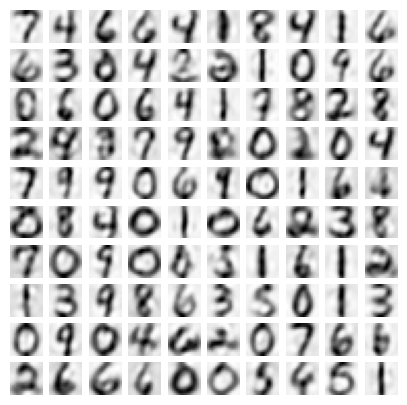

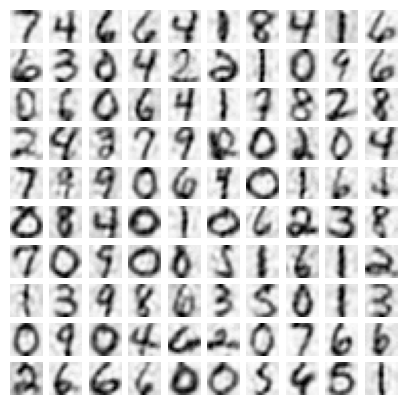

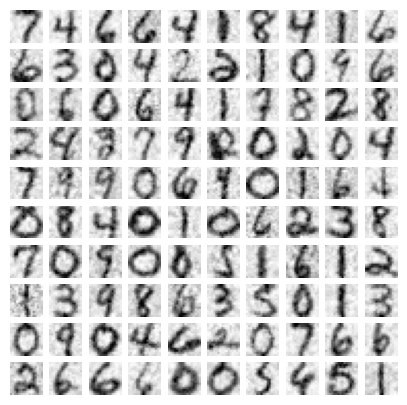

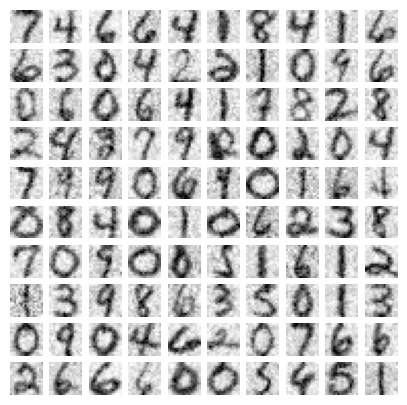

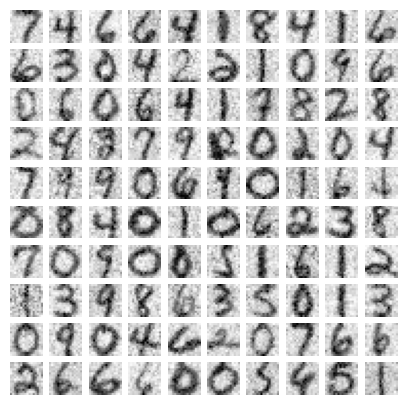

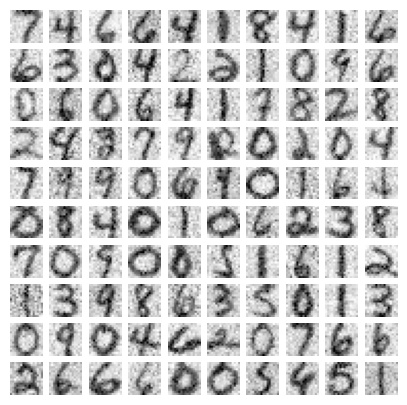

In [29]:
# Define a range of values for n (number of principal components to retain)
n_values = [10, 25, 50, 100, 150, 200, 250]

# Perform PCA for different values of n and visualize the denoised images
for n in n_values:
    # Get principal components
    PC_image = get_principal_comps(X_train, Vt, n)
    
    # Reconstruct the training data
    recons_img = reconstruct_data_mat(PC_image, Vt, n)
    
    # Print the title
    print(f'Reconstructed Images (n={n})')
    
    # Visualize the denoised images
    plot_mnist_images(recons_img)

### The noise is considerably reduced in the range 50-100 without much loss of data. Below 50 the image is very blurred and above it the image has too much noise. This count can be further optimised by taking components between the range 50-100. Further iterations could provide better balance between denoising and loss of data.

Reconstructed Images (n=50)
Reconstructed Images (n=60)
Reconstructed Images (n=70)
Reconstructed Images (n=80)
Reconstructed Images (n=90)
Reconstructed Images (n=100)


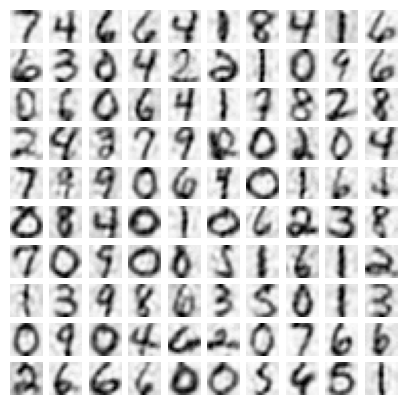

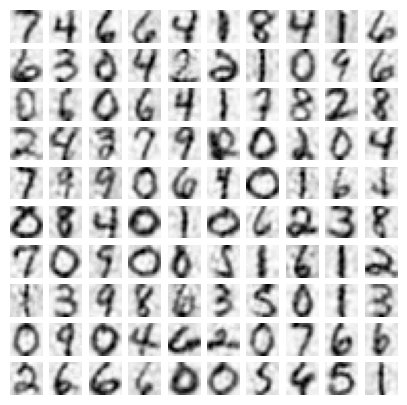

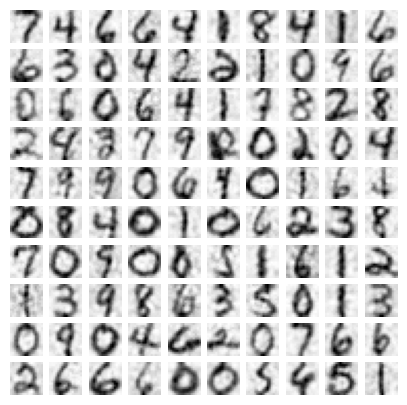

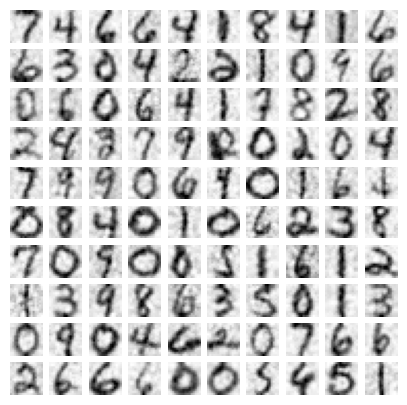

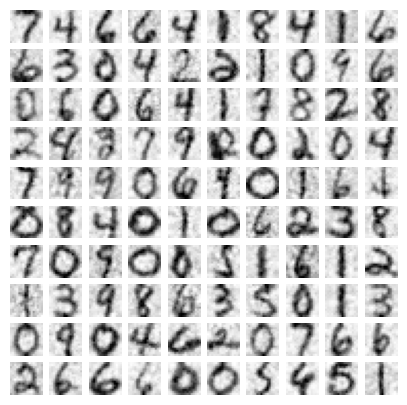

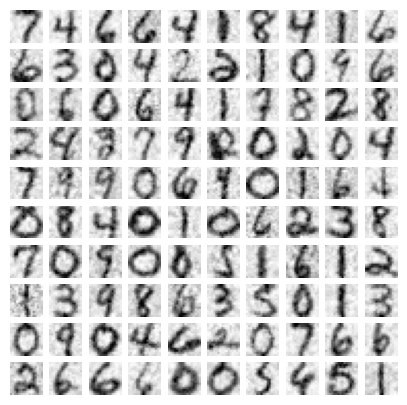

In [30]:
# Define a range of values for n (number of principal components to retain)
n_final_values = [x for x in range (50,110,10)]

# Perform PCA for different values of n and visualize the denoised images
for n in n_final_values:
    # Get principal components
    PC_image = get_principal_comps(X_train, Vt, n)
    
    # Reconstruct the training data
    recons_img = reconstruct_data_mat(PC_image, Vt, n)
    
    # Print the title
    print(f'Reconstructed Images (n={n})')
    
    # Visualize the denoised images
    plot_mnist_images(recons_img)

### An appropriate number of principal components for visualising the denoised images is 50, since increasing components does not seem to be very useful.

### (d) Plot the randomly chosen de-noised test images and note down your observations

Reconstructed Images (n=50)


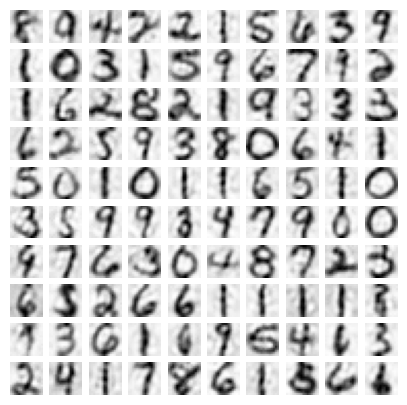

In [31]:
# Get principal components
PC_test = get_principal_comps(X_test, Vt, 50)

# Reconstruct the training data
recons_img = reconstruct_data_mat(PC_test, Vt, 50)

# Print the title
print(f'Reconstructed Images (n={50})')

# Visualize the denoised images
plot_mnist_images(recons_img)

## Observation
Noise Reduction: The de-noised images clearly demonstrated a reduction in noise compared to their original counterparts. Background noise, which was initially present in the original images, appeared less pronounced in the de-noised versions.

Loss of Detail, Smoothing and Blurring: It's important to note that when using a lower number of principal components for de-noising, there was a noticeable trade-off. While noise was effectively reduced, there was a slight loss of fine details in the images. This resulted in a blurriness or reduced sharpness when compared to the original images. De-noised images also exhibited a smoothing effect, particularly in areas with texture or sharp transitions. 

Optimal Number of Principal Components: Upon careful observation of de-noised images at various numbers of principal components, a distinct pattern emerged. There appeared to be an optimal range where noise reduction was effective without overly compromising image quality. This range allowed for a balanced approach to noise reduction and image clarity. This range falls somewhere between 50-100 components.